<a href="https://colab.research.google.com/github/surya81/Alma-better-projects/blob/main/Telecom_Churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project name - Telecom Churn Analysis**

#### **Type** - EDA
#### **Contribution** - **Individual**

# **Problem Analysis**

 **Every telecom service provider company in course of development to adding new customers makes sures that they donot loose their existing customers .However every year a large no of people using their services changes from one provider to another in search of better services and price feasibilty,In oerder to bring back these existing customer an company eventually found themselves in expending a lot off costs**
**So,In order to maintain and develop better plans telecom compamnies does regular churn analysis of their customers for taking feedback in their lacking services and how to do better on these feedbackstext**

# **Objective**

**we will try to absorb valuable information from the customer data and we will use this information  to help in developing some new plans and method which will automitically leads us in reducing customer churn rate of the company**

#**Libraries**

In [90]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

#**Dataset Loading**

In [2]:
def DatasetLoader(path): # A function to load the dataset 
    """
    Argument - path to the dataset 
    this function the the csv file using pandas function 
    return dataframe  """

    try :
        df = pd.read_csv(path) # read the data in csv format
        return df

    except: # if the path is not correct
        print("the specified file path is not correct")


In [3]:
telecom_dataset = DatasetLoader('/content/Telecom Churn.csv')#store the dataframe in telecom_df variable

# **Dataset Exploration**

In [4]:
telecom_dataset.head() #observe the first 5 rows of dataframe

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
print(f"the telecom  dataset has {telecom_dataset.shape[0]} rows and {telecom_dataset.shape[1]} columns ")

the telecom  dataset has 3333 rows and 20 columns 


#### **Dataset information**

In [6]:
telecom_dataset.info() # some basic information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

#### **Missing Values in Dataset**

In [7]:
telecom_dataset.isna().sum() # sum of missing values throughout each rows in dataset

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

#### **duplicated rows in dataset**

In [8]:
# Dataset Duplicate Value Count
print(len(telecom_dataset[telecom_dataset.duplicated()]))

0


**The dataset has total of 19 columns out of which 3 are object dtype , 8 are of float and int each and the last column which is also the target variable is bool type**

**Fortunately the data donot have any null values and any duplicated rows out of total 3333 rows and 19 columns**


# **Column description**



**State** - 51 Unique states of united states of america 

**Account length** - account length of each customer 

**Area Code** - 3 different area code for collectively all customer 

**International plan** - whethear a customer opted for internartional plan or not 

**Voicemail Plan** - wheather a customer has active voice mail plan

**number vmail message** - Number of voicemail message of each customer ranging from 0 to 50 

**Total day minutes** - duration of call made during morning 

**Total day calls** - total number of made during morning 

**Total day charge** - total morning charge to the customer

**Total eve minutes** - duration of call made during evening 

**Total eve calls** - total number of made during evening 

**Total evening charge** - total evening charge to the customer

**Total nigt minutes** - duration of call made during night

**Total night calls** - total number of made during night 

**Total night charge** - total morning charge to the night 

**churn** - wheather a customer opted for change in its telecom False for no  True for yes 



#### **total no of unique element in each column**

In [9]:
# function to count and print  unique no of elements in dataframe
def count_unique(dataframe): 
    """ 
    Argument - dataframe of the consideration 

    this function prints no of unique elements in each column 
    """
    try: 
        for columns in dataframe.columns.tolist():
            print(f"Total unque no of row in {columns} is {dataframe[columns].nunique()} ")

    except: #if dataframe does not exist 
        print("provided dataframe does not exist ")

In [10]:
# calling the function 
count_unique(telecom_dataset)

Total unque no of row in State is 51 
Total unque no of row in Account length is 212 
Total unque no of row in Area code is 3 
Total unque no of row in International plan is 2 
Total unque no of row in Voice mail plan is 2 
Total unque no of row in Number vmail messages is 46 
Total unque no of row in Total day minutes is 1667 
Total unque no of row in Total day calls is 119 
Total unque no of row in Total day charge is 1667 
Total unque no of row in Total eve minutes is 1611 
Total unque no of row in Total eve calls is 123 
Total unque no of row in Total eve charge is 1440 
Total unque no of row in Total night minutes is 1591 
Total unque no of row in Total night calls is 120 
Total unque no of row in Total night charge is 933 
Total unque no of row in Total intl minutes is 162 
Total unque no of row in Total intl calls is 21 
Total unque no of row in Total intl charge is 162 
Total unque no of row in Customer service calls is 10 
Total unque no of row in Churn is 2 


#### **description of columns**

In [11]:
telecom_dataset.describe() # description of numerical columns in the dataframe 

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [12]:
#print the element name where no of unique elements in columns are less than or eaqual to three 
def display_unique_elements(dataframe):
    """ 
    Argument - dataframe we wish to know unique elements about 
    this function uinque elements where no unique elements are less than 3 
    return - none 
    """
    try :
        for columns in dataframe.columns.tolist():#converts column array to  a list 
            if dataframe[columns].nunique() <= 3 :
                print(f" the unique element in {columns} columns are  {dataframe[columns].unique()}")
    except :
        print('invalid dataframe')

In [13]:
#call function 
display_unique_elements(telecom_dataset)

 the unique element in Area code columns are  [415 408 510]
 the unique element in International plan columns are  ['No' 'Yes']
 the unique element in Voice mail plan columns are  ['Yes' 'No']
 the unique element in Churn columns are  [False  True]


**out of the four columns whose no of unique elements are less than or equal to 3 . 3 are in yes/no format we can change these with 0 and 1 . 1 for true and 0 for false**

#**Dataset manipulation**

####**Copy original dataset**

**We are going to bring a lot of changes in our dataset in order to explore it but the changes made in our dataset should not affect the real one**

In [14]:
# A function to make the copy of a dataset and return it 
def make_copy(original_dataframe):
    try:
        copied_dataframe= original_dataframe.copy(deep=True) #with deep is equal to true the changes made in copied dataframe wont appear in the original
        return copied_dataframe
    except:# if the dataset does not exist
        print("the dataframe which is to be copied does not exists")

    finally:
        print("operation performed on dataset")

In [15]:
#calling the function and making the copy of dataset
telecom_df = make_copy(telecom_dataset)

operation performed on dataset


#### **Replace column having few unique variable**

In [16]:
#function to replace variable where number of unique item is less than 3 with 1 and 0  
def replace_items(dataframe,column,variable_1,variable_2):
    """
    arguments :
    dataframe - the dataframe on which we want to perform the action 
    column - column of the dataframe where no of unique valuie are less than 3 
    variable1, variable2 - name of the element to replace 

    this function returns dataframe  
    """
    try:
        df = dataframe.replace({column:{variable_1:1,variable_2:0}})

    except :
        print("specified arguments are not correct please check")

    finally:
        return df 

In [17]:
# change the column International plan columns value wth {yes  :1,No:0}
telecom_df = replace_items(telecom_df,'International plan','Yes','No')#call the function 

In [18]:
# change the column Voice mail plan value wth {yes  :1,No:0}
telecom_df = replace_items(telecom_df,'Voice mail plan','Yes','No')#call the function 

In [19]:
# change the column Churn  value wth {True  :1,False:0}
telecom_df = replace_items(telecom_df,'Churn',True,False)#call the function 

#### **Creating special variable**

In [20]:
# make an another variable whic counts the overall duration of calls of a customer in a single 24 hour day 
telecom_df["overall_call_duration"] = telecom_df['Total day minutes']+telecom_df['Total eve minutes'] +telecom_df['Total night minutes']

In [21]:
# make an another variable whic counts the overall charges of calls of a customer in a single 24 hour day 
telecom_df["overall_call_charges"] = telecom_df['Total day charge']+telecom_df['Total eve charge'] +telecom_df['Total night charge']

In [22]:
# make an another variable whic counts the overall duration of a customer in a single 24 hour day 
telecom_df["overall_call_made"] = telecom_df['Total day calls']+telecom_df['Total eve calls'] +telecom_df['Total night calls']

In [23]:
#calculate the average plan f each customer 
telecom_df["Average_price_plan"] = telecom_df["overall_call_duration"]//telecom_df["overall_call_charges"]

In [24]:
# for the customers who become active at night 
telecom_df['intern_call_duration']=telecom_df['Total intl minutes']/telecom_df['Total intl calls']

In [25]:
#Does the customer who have different night day and evening plan are more prone to churn 
telecom_df['international_rate_per_min']=telecom_df['Total intl charge']/telecom_df['Total intl minutes']
telecom_df['day_rate_per_min']=telecom_df['Total day charge']/telecom_df['Total day minutes']
telecom_df['eve_rate_per_min']=telecom_df['Total eve charge']/telecom_df['Total eve minutes']
telecom_df['night_rate_per_min']=telecom_df['Total night charge']/telecom_df['Total night minutes']

# **Dataset Wrangling**

###**Dataset Columns wrangling**

#### **Overall churn ratio**

In [26]:
#find out ratio of churn i.e peole who changed telecom to the people who are consistent 
print( {telecom_df["Churn"].value_counts().loc[0]/telecom_df["Churn"].value_counts().loc[1]})

{5.900621118012422}


**So for every 7 people 1 person has changed his operator**

####  **With Area code**

**Since all the dataset has been divided in just three area code,**
**Hence we will begin our analysis with this column**

In [27]:
telecom_df.groupby("Area code")["overall_call_duration"].mean().reset_index() # Average call duration in each area code 

,Area code,overall_call_duration
0,408,577.674344
1,415,584.282296
2,510,580.340595


**Across all area code same amount of call_duration are made**

In [28]:
telecom_df.groupby(["Area code","Churn"])["overall_call_duration"].mean().reset_index()

,Area code,Churn,overall_call_duration
0,408,0,570.147905
1,408,1,621.845902
2,415,0,576.711487
3,415,1,629.803390
4,510,0,573.880280
5,510,1,617.293600


In [29]:
telecom_df.groupby("Area code")["Average_price_plan"].mean().reset_index() #across al the area code the average plan are same

,Area code,Average_price_plan
0,408,9.887828
1,415,9.844713
2,510,9.878571


In [30]:
telecom_df.groupby(["Area code","Churn"])["intern_call_duration"].mean().reset_index()

,Area code,Churn,intern_call_duration
0,408,0,3.058391
1,408,1,3.603712
2,415,0,3.008505
3,415,1,3.452771
4,510,0,3.064365
5,510,1,3.743064


In [31]:
telecom_df.groupby("Area code")["Churn"].value_counts().unstack() # total sum of churn across all area code

Churn,0,1
Area code,,
408,716,122
415,1419,236
510,715,125


**In 415 area code a double of customer moved from one telecom company to other than other two area code **

#### **With States**

In [32]:
print(telecom_df["State"].unique())# show unique states in the data 
print("")
print( {telecom_df["State"].nunique()}) # count of total unique states in data

['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']

{51}


In [33]:
telecom_df.groupby("State")["Churn"].sum().reset_index().sort_values("Churn",ascending = False) #arrange the index in their sum of largest to rarest churn customers 

,State,Churn
31,NJ,18
43,TX,18
20,MD,17
22,MI,16
23,MN,15
34,NY,15
26,MT,14
33,NV,14
25,MS,14
40,SC,14


**`NJ` and `TX` has the largest churn customer . Also `AK` ,`iA` and `HI` has the lowest churn customer**

#### **With international Calls and Their plans**

In [34]:
#there is a larges section of people who have opted for international price plan and voicemail message 
telecom_df_with_international_plan = telecom_df[telecom_df["International plan"]==1] #1 is for yes 
telecom_df_not_international_plan = telecom_df[telecom_df["International plan"]==0] #0 is for No
#churn rate for people having international plan
print(telecom_df_with_international_plan["Churn"].value_counts())
print(telecom_df_not_international_plan["Churn"].value_counts())

0    186
1    137
Name: Churn, dtype: int64
0    2664
1     346
Name: Churn, dtype: int64


In [35]:
print(telecom_df_with_international_plan["international_rate_per_min"].mean())
print(telecom_df_not_international_plan["international_rate_per_min"].mean())

0.2700382724389779
0.2700585182510288


**people having international plan were more prone to churn**

In [36]:
#there are some customer who have opted for voicemail 
telecom_df_with_voicemail_plan = telecom_df[telecom_df["Voice mail plan"]==1]
# churn rate for people having voicemail plan 
print(telecom_df_with_voicemail_plan["Churn"].value_counts())
telecom_df_not_voicemail_plan = telecom_df[telecom_df["Voice mail plan"]==0]
print(telecom_df_not_voicemail_plan["Churn"].value_counts())


0    842
1     80
Name: Churn, dtype: int64
0    2008
1     403
Name: Churn, dtype: int64


**people having voicemail plan have only 10 % chances of churn**

#### **Churn rate changes with normal talktime**

In [37]:
#compare churn rate when call duration of people is greter than 50 %
telecom_overall_call_made_df_50 = telecom_df[telecom_df["overall_call_made"]>301]
telecom_overall_call_made_df_50["Churn"].value_counts()

0    1403
1     245
Name: Churn, dtype: int64

In [38]:
# what about the people which are more active at nights 
telecom_df_night_call = telecom_df[telecom_df["Total night minutes"]>235]
telecom_df_night_call["Churn"].value_counts()

0    709
1    130
Name: Churn, dtype: int64

**It turns out that people who are more active at nights are less prone to churn**

In [39]:
# what about the people which are more active at day  than 75 % people 
telecom_df_day_call= telecom_df[telecom_df["Total day minutes"]>220]
telecom_df_day_call["Churn"].value_counts()

0    529
1    238
Name: Churn, dtype: int64

**people who are more active day time than 75% people are more to churn**

In [40]:
# plan price at which people were less prone to churn 
telecom_df_average_price_plan= telecom_df[telecom_df["Average_price_plan"]>=10]
print(telecom_df_average_price_plan["Churn"].value_counts())
print(telecom_df[telecom_df["Average_price_plan"]<=9]["Churn"].value_counts())

0    1852
1     236
Name: Churn, dtype: int64
0    998
1    247
Name: Churn, dtype: int64


In [41]:
#effect of customer service calls on churn 
print(telecom_df[telecom_df["Customer service calls"]<=1]["Churn"].value_counts())
print(telecom_df[telecom_df["Customer service calls"]>=2]["Churn"].value_counts())
print(telecom_df[telecom_df["Customer service calls"]>=4]["Churn"].value_counts())

0    1664
1     214
Name: Churn, dtype: int64
0    1186
1     269
Name: Churn, dtype: int64
1    138
0    129
Name: Churn, dtype: int64


**When  2 or more customer service calls were made than people were less prone to churn**

### **Data Insights**

**Going through the company data we found data for every 7 customer of the company 1 person moved out of to be changing its operator.At first it may not look very big problem but telecom companies are supposed to be runnng on very large person connectivity which are gennerally in millions.so for every 7 million subscriber 1 million subscriber have changed its operator now thats look like a big issue**

**Some of the issue i found in the company dataset which may be a reason for customer changing its oprator are as**

**across area code**

*if we look only behaviour of customers across all area code it may look very similar but diving deep we find that out of three area `415` have the highest number of customer and their churn rate but it look surprising that they they same amount of call duration lets see it through a table*



| **Area code**| **customer** |**churn**|**Avg_int_call_duration_of_consistent**|**Avg_int_call_duration_of_Churn**|**Avg_overall_call_duration_consistent**|**Avg_overall_call_duration_churn**|
| ----| ------------- |-----|---------------------------|-|-|-|
| 408 | 838  |122           |3.05 |3.60 |570    |621
| 415 | 1655 |236           |3.00 |3.45 |576    |629
| 520 | 840  |125           |3.06 |3.74 |573    |617


*going through the table we cans see that people who have churned are the one who were using the telecom mostly in national or international, it may happen because these customer may find themseleves that even they usinh it  most they are not getting any special treatment*



**Through states** 

one peculiar statistic thng we finded through the states that number churn ascending order through the states in a counting number fashion. these may happen due to facts may be as their geographical distance increases with increasing geographical area , their network or connectivity started decreasing.

**International plan effect**

we observed that among people who opted for the international plan 
`50%` have changed their telecom service this may be due to the fact that international plan are national plan almost same .

**Voicemail plan**

the company had shown good response towards customer who have opted for their voicemail plan as the people using voicemail plan were very less in rationto change the telecom than the  people who has not opted for voicemail plan 

**Price plan and customer and customer service calls**

when customer price plan were less than or equal to 9 than the people were very less to churn we it is greater or equal to 10 . 
Also we have founded with the increase in customer service calls A large people tend to change their telecom operator

#**Data Visualization**

### **Chart 1**

0    2850
1     483
Name: Churn, dtype: int64


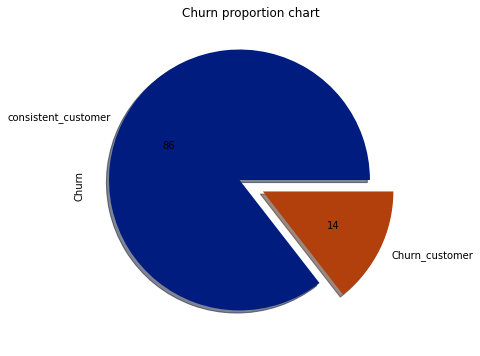

In [42]:
#Chart 1 univariate Analysis
#we will see the proportion of churn ith dataset
print(telecom_df["Churn"].value_counts())
palette_color = sns.color_palette('dark')# we will use dark pallete for pie chart color
telecom_df["Churn"].value_counts().plot(kind = 'pie',
                                        figsize=(8,6), # set figure size to display
                                        title="Churn proportion chart", #set title
                                        labels = ["consistent_customer","Churn_customer"], # labels ofeach piece
                                        colors = palette_color,
                                        shadow = True, # show shadow by default it is False
                                        autopct= '%.f',
                                        explode  = [0.1,0.1]) #explode pieces
# save the chart with a file name                                        
plt.savefig("pie_chart_for_churn")

#### **why pie chart**

*A pie chart shows the relationships of parts to the whole for a variable.it help us understand the parts-to-a-whole relationshipWith categorical data,The slices in the pie typically represent percentages of the total. the sample is often divided into groups and the responses have a defined order. For example, in a survey where you are asked to give your opinion on a scale from “Strongly Disagree” to “Strongly Agree,” your responses are categorical.Wtih nominal data, the sample is also divided into groups but without any particular order.*

####**Insights**
*the dataset is not so balanced which is good as only 14 % of customers have churned . however this number may look very smal at very begining but considering the facts that telecom industry operates on 10 millions of customer . 14 % is a very large amunt . a company invest a large cost on gaining even 1 new customer  and loosing so much is that the company will think at the last*

### **Chart2 correlation plot**

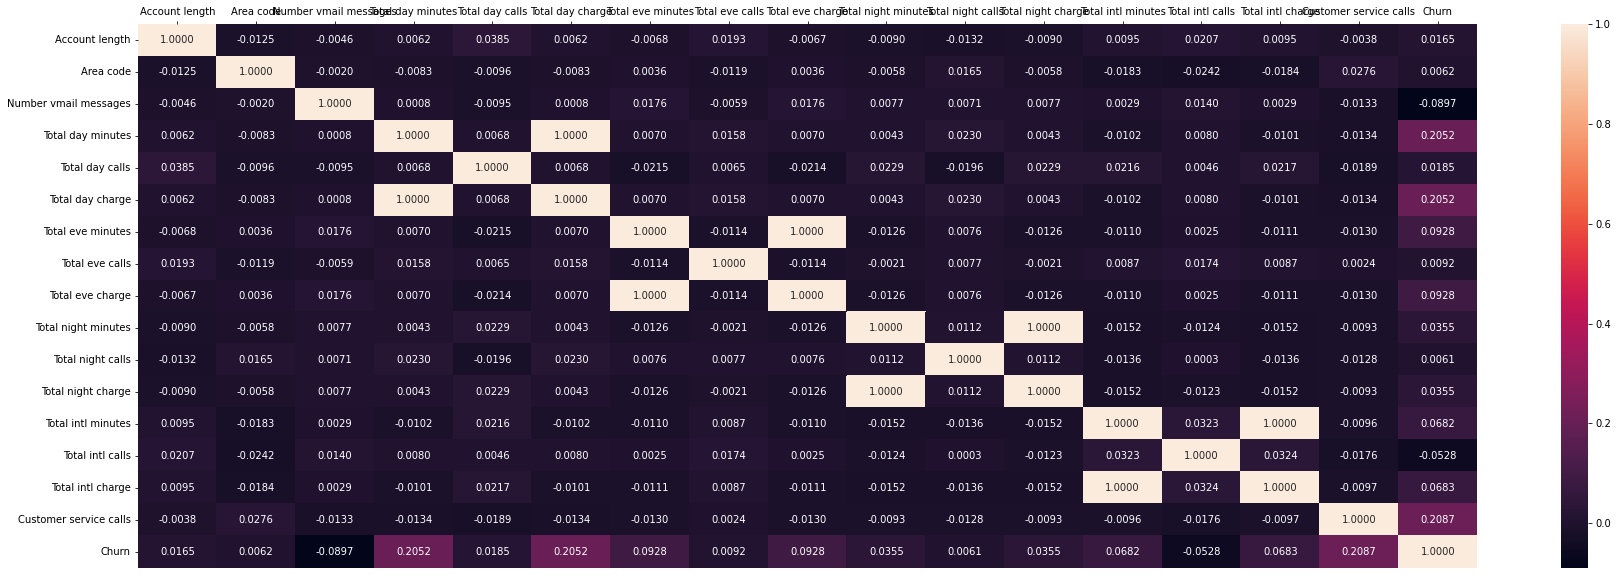

In [50]:
#plot correlation matrix of the data 
plt.rcParams["figure.figsize"] = (30,10)#set the figure size with rcparams
ax = sns.heatmap(telecom_dataset.corr(method='pearson'),# we will use pearson method 
            annot=True, #annot with inthe figure 
            fmt=".4f",
            )
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top() #will show xtick valu on top more clear visual 

####**why correlation heatmap**

*A correlation matrix is simply a table which displays the correlation coefficients for different variables. The matrix depicts the correlation between all the possible pairs of values in a table. It is a powerful tool to summarize a large dataset and to identify and visualize patterns in the given data. However Heatmaps are used to show relationships between two variables, one plotted on each axis. By observing how cell colors change across each axis, you can observe if there are any patterns in value for one or both variables.*

####**Insights**
*Through visual map of correlation we were able to anlyze the visual understanding of how the columns weere related to each other .like as day call where directly positively related with day charge. same with evening and night charges and international charges with international duration.we must see that there are 22 columns so even with very less correlation numerical value they are highly related*

###**Chart3**

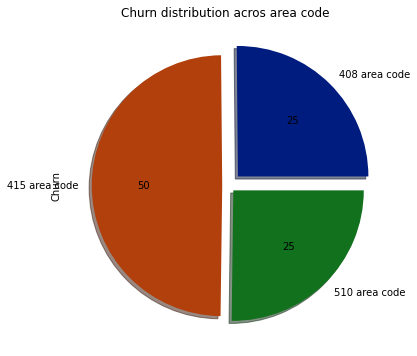

In [57]:
#Chart 3 univariate Analysis of area code 
# since all the customers are divided across only three area code
palette_color = sns.color_palette('dark')# we will use dark pallete for pie chart color
telecom_df.groupby("Area code")["Churn"].count().plot(kind = 'pie',
                                        figsize=(8,6), # set figure size to display
                                        title="Churn distribution acros area code  ", #set title
                                        labels = ["408 area code","415 area code","510 area code"], # labels ofeach piece
                                        colors = palette_color,
                                        shadow = True, # show shadow by default it is False
                                        autopct= '%.f',
                                        explode  = [0.1,0.05,0.05]) #explode pieces
# save the chart with a file name                                        
plt.savefig("churn distributuion across states")

####**Why pe chart**

*as explainded A pie chart shows the relationships of parts to the whole for a variable.it help us understand the parts-to-a-whole relationshipWith categorical data,The slices in the pie typically represent percentages of the total. the sample is often divided into groups and the responses have a defined order. For example, in a survey where you are asked to give your opinion on a scale from “Strongly Disagree” to “Strongly Agree,” your responses are categorical.Wtih nominal data, the sample is also divided into groups but without any particular order*

#### **Insights**


*with the chart we were able to analyze that the churn data is more sarturarted towards 415area code this is also due to rthe case almost 2x people are using the telecom operator in area 415.so it is natural to have more churn in this area*

### **Chart4**

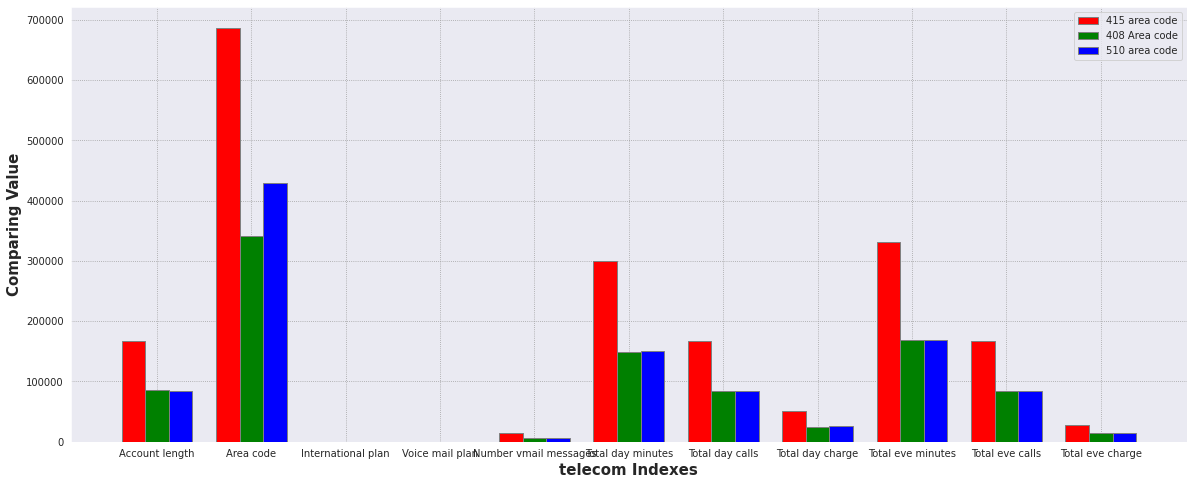

<Figure size 432x288 with 0 Axes>

In [98]:
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(20, 8))
 
# Set position of bar on X axis
br1 = np.arange(len(telecom_df[telecom_df["Area code"] == 415].mean().iloc[1:12].index))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, telecom_df[telecom_df["Area code"] == 415].sum().iloc[1:12].values, color ='r', width = barWidth,
        edgecolor ='grey', label ='415 area code')
plt.bar(br2, telecom_df[telecom_df["Area code"] == 408].sum().iloc[1:12].values, color ='g', width = barWidth,
        edgecolor ='grey', label ='408 Area code')
plt.bar(br3, telecom_df[telecom_df["Area code"] == 510].sum().iloc[1:12].values, color ='b', width = barWidth,
        edgecolor ='grey', label ='510 area code')
 
# Adding Xticks
plt.xlabel('telecom Indexes', fontweight ='bold', fontsize = 15)
plt.ylabel('Comparing Value', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(telecom_df[telecom_df["Area code"] == 415].mean().iloc[1:12].index))],
        telecom_df[telecom_df["Area code"] == 415].mean().iloc[:12].index)
 
plt.legend()
plt.show()
plt.savefig("Commulatative bar plot of states")

#### **Why bar chart**

*A bar chart plots numeric values for levels of a categorical feature as bars. Levels are plotted on one chart axis, and values are plotted on the other axis. Each categorical value claims one bar, and the length of each bar corresponds to the bar’s value. Bars are plotted on a common baseline to allow for easy comparison of values.it is used when we want to show a distribution of data points or perform a comparison of metric values across different subgroups of your data. From a bar chart, we can see which groups are highest or most common, and how other groups compare against the others. Since this is a fairly common task, bar charts are a fairly ubiquitous chart type.*

#### **Insights**

*Through plot we found oot that customer segmentation are uniformly distributed acros all states as the number of customer 2x in area 415. their call duration and calling times are also 2 times show it shows the uniformity of customer across all area codes*

###**chart 5**

Text(0.5, 1.0, 'Boxplot for account length')

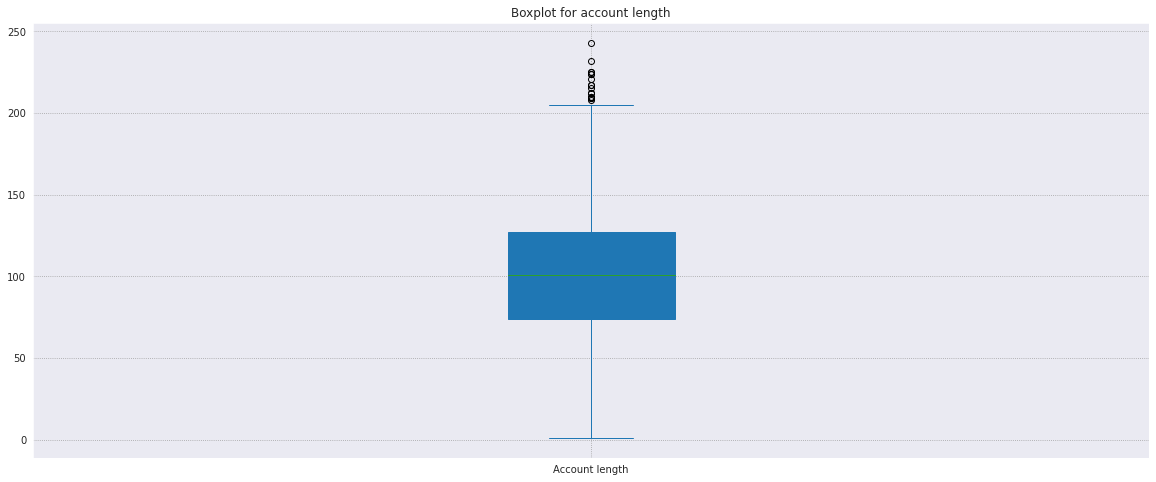

In [103]:
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
# set width of bar
fig = plt.subplots(figsize =(20, 8))
#account length of customer are less than total no of customer 
#find outlier in account length
telecom_dataset["Account length"].plot(kind='box',
                                       patch_artist = True,)
plt.title("Boxplot for account length")

#### **why box plot**

*A box plot (aka box and whisker plot) uses boxes and lines to depict the distributions of one or more groups of numeric data. Box limits indicate the range of the central 50% of the data, with a central line marking the median value. Lines extend from each box to capture the range of the remaining data, with dots placed past the line edges to indicate outliers.*

#### **insight**

*Through chart we observed that a large no og account lies out of the 3 iqr range  which lies in the outlier*

### **Chart 6**

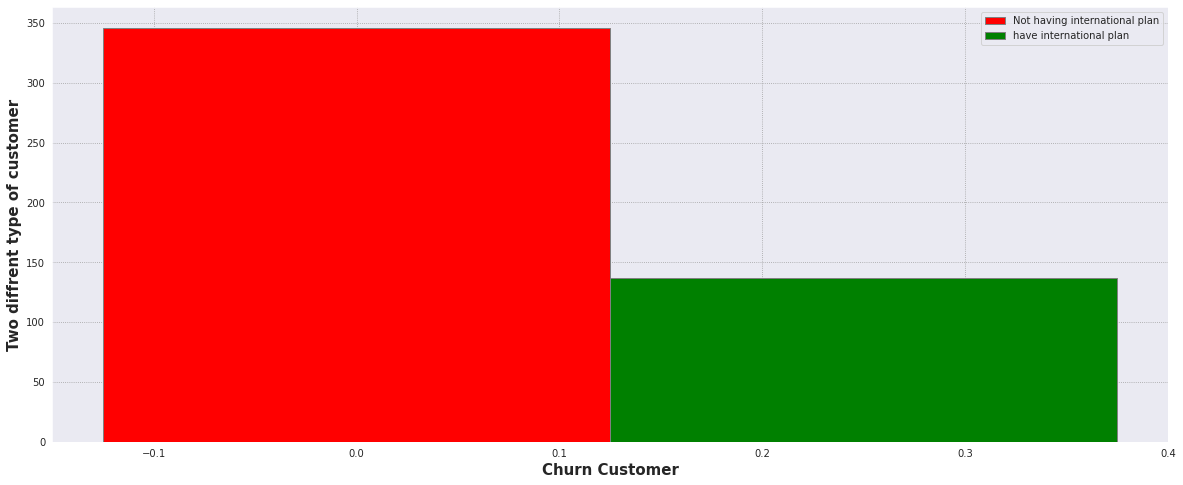

In [178]:
#effect of internation call on churn
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(20, 8))
 
# Set position of bar on X axis
br1 = np.arange(0,1)
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, telecom_dataset.groupby("International plan")["Churn"].sum().reset_index().iloc[0][1], color ='r', width = barWidth,
        edgecolor ='grey', label ='Not having international plan')
plt.bar(br2,telecom_dataset.groupby("International plan")["Churn"].sum().reset_index().iloc[1][1], color ='g', width = barWidth,
        edgecolor ='grey', label ='have international plan')
 
# Adding Xticks
plt.xlabel('Churn Customer', fontweight ='bold', fontsize = 15)
plt.ylabel('Two diffrent type of customer', fontweight ='bold', fontsize = 15)
plt.legend()
plt.show()

In [181]:
telecom_dataset.groupby("Voice mail plan")["Churn"].sum().reset_index().iloc[0]

Voice mail plan     No
Churn              403
Name: 0, dtype: object

#**Suggestions**

1. we have founded that person who were the telecom most were the one who lefted . so the company must analyze its customer interaction and try to provide some better plans to them 
2. we have founded that some churn were due to network or connectivity roblem . the company must try to increase their reach through more networks
3. price plan 

In [99]:
telecom_dataset

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
